## try hands on 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# visualize earning based on college majors
- i have to describe the dataset heavily here 

### main qustions we need to answer via data visualization 
**do students in more popular majors make more money?**
- using scatter plot

**how many majors are predominantly mal ? predominantly female ?**
- using histograms

**which ategory of majors have the most students?**
- using bar plots 
        
we will try to answer all these quetions but first we will remove the rows containing the null values in the dataset 

In [2]:
# read the data 
majors = pd.read_csv("recent-grads.csv")

# display the first row 
majors.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                             2339.000000
Men                               2057.000000
Women                              282.000000
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

-  we removed only one row which contains null values the row with index 21 

In [3]:
majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
# check for null values 
print("number of row: ", majors.shape[0])
# drop any row contains null values 
majors = majors.dropna(axis = 0, how = "any")

print("number of rows after:" , majors.shape[0])


number of row:  173
number of rows after: 172


In [5]:
# generate some summary statisitics about the data for numerical columns
majors.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


<AxesSubplot:xlabel='Men', ylabel='Women'>

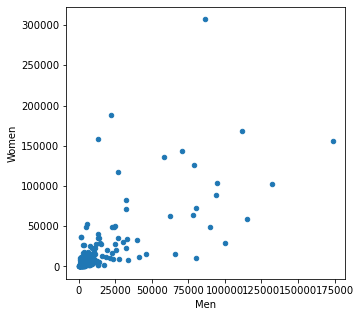

In [6]:
# start the visualization process using pandas buil-in viz methods 
# 1- scatter plots 

majors.plot(x = "Men" , y= "Women" , kind = "scatter" , figsize = (5,5) )


<AxesSubplot:xlabel='Sample_size', ylabel='Employed'>

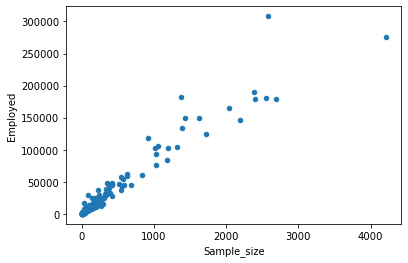

In [7]:
majors.plot(x= "Sample_size" , y= "Employed", kind= "scatter")

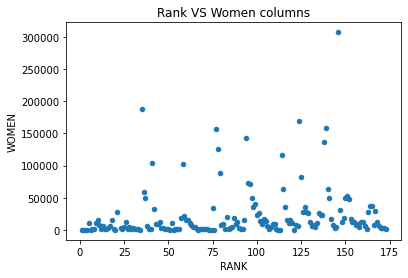

In [8]:
# access the pyplot axis 

ax = majors.plot(x= "Rank" , y= "Women" , kind = "scatter" , title= "rank vs Women")
ax.set_title("Rank VS Women columns")
ax.set_xlabel("RANK")
ax.set_ylabel("WOMEN")

plt.show()

Text(0.5, 0, 'Women number in subject ')

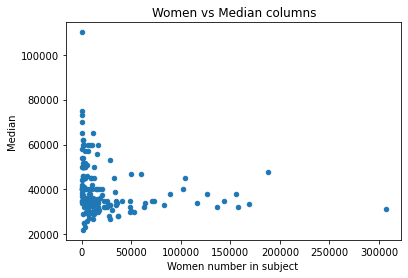

In [9]:
# generate another scatter plot 

ax = majors.plot(x= "Women" , y="Median" , kind= "scatter")

ax.set_title("Women vs Median columns")
ax.set_xlabel("Women number in subject ")

- from the plots no it does not matter you are in the most popular majors or not to get high salary because some jobs has less students and they have higher salaries

Text(0.5, 0, 'men')

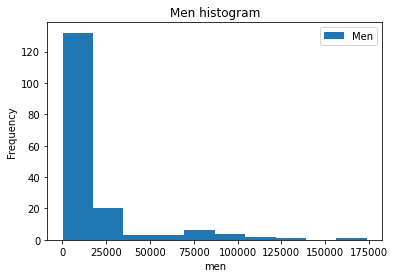

In [10]:
# pandas histogram 
# Series.plot()

ax = majors["Men"].plot(kind= "hist" , legend = "best")
ax.set_title("Men histogram")
ax.set_xlabel("men")


- the histogram shows the distribution of the data 
most of the data of men column falls between `0 , 3 0000 `

Text(0.5, 1.0, 'series histogram')

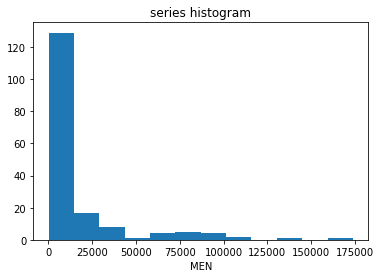

In [11]:
# there is another method for histogram can be used directly 
# Series.hist()

ax = majors["Men"].hist(grid = False, bins = 12)
ax.set_xlabel("MEN")
ax.set_title("series histogram")

<AxesSubplot:>

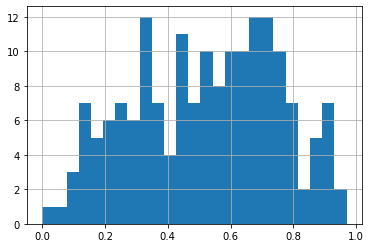

In [12]:
majors["ShareWomen"].hist(bins= 25 )

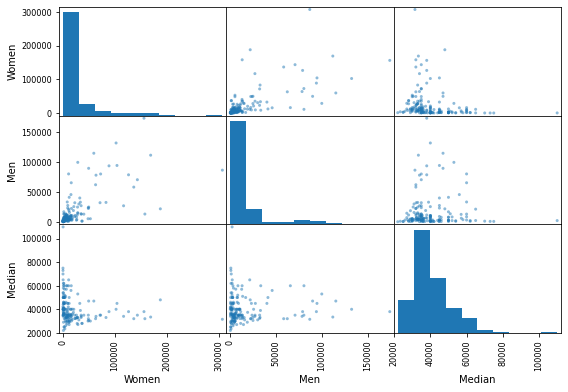

In [13]:
# using scatter_matrix function to plot 

from pandas.plotting import scatter_matrix 

frame = majors[["Women" , "Men" , "Median"]]

scatter_matrix(frame = frame, figsize= (9,6), diagonal= "hist")


plt.show()

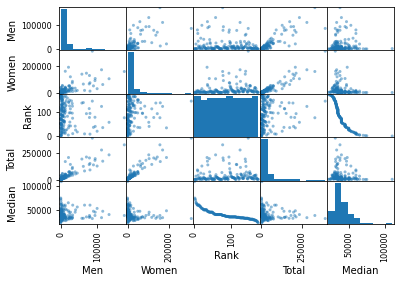

In [14]:
pd.plotting.scatter_matrix(majors[["Men", "Women", "Rank", "Total", "Median"]], alpha= 0.5, grid= 0)
plt.show()

<AxesSubplot:>

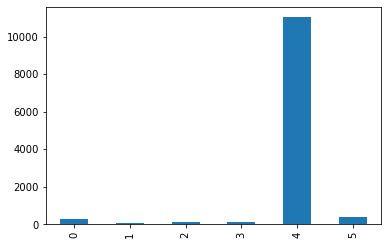

In [15]:
# pandas bar  plots
# first 5 rows for women column 

majors.loc[:5 , "Women"].plot(kind= "bar")


Text(0.5, 1.0, 'Women vs Major')

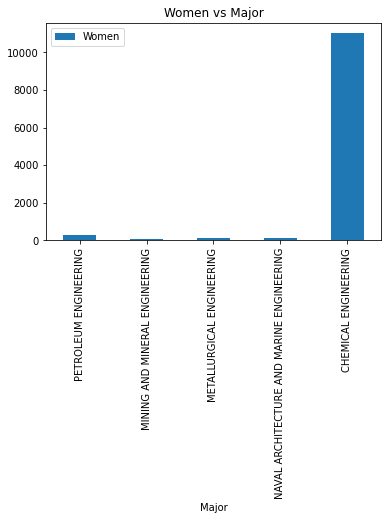

In [16]:
ax = majors[:5].plot.bar(x= "Major" , y= "Women")
ax.set_title("Women vs Major")

In [17]:
majors[:5].append(majors[-10:])

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466


**try to answer the following questions based on the previous plots**
- Do students in more popular majors make more money ?
- Do students that majored in subjects that wre majority female make more money ?
- is there any link between the number of full time employee and median salary ?

## pandas groupby

In [18]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [23]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
          ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
                  index=index)



Max Speed
Animal Type              
Falcon Captive      390.0
       Wild         350.0
Parrot Captive       30.0
       Wild          20.0

In [24]:
df.groupby(level=0).mean()

,Max Speed
Animal,
Falcon,370.0
Parrot,25.0


In [26]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [34]:
df.groupby("Sales").max()

,Company,Person
Sales,,
120,GOOG,Charlie
124,MSFT,Vanessa
200,GOOG,Sam
243,FB,Carl
340,MSFT,Amy
350,FB,Sarah
